## Clustering the images using k-means

In [163]:
filename = 'result-wse_flickr.jsonl'
filepath = '../tasks/03.image-crawl'

import os

filename = os.path.join(filepath, filename)
print filename

print os.path.exists(filename)

../tasks/03.image-crawl/result-wse_flickr.jsonl
True


In [221]:
# load the data
# only get the data for query='bench'

lines = open(filename).readlines()
print len(lines)

import json
items = [json.loads(line) for line in lines]
items = filter(lambda item: item.get('embeds') and item.get('query') == 'toothbrush', items)
print len(items)

print items[0].keys()


17224
700
[u'flickr_title', u'flickr_desc', u'flickr_pageurl', u'query', u'ref_urls', u'probs', u'flickr_username', u'title', u'flickr_realname', u'flickr_date_taken', u'flickr_date_posted', u'flickr_tags', u'tags', u'embeds', u'image_urls', u'qrank', u'flickr_location', u'flickr_comments', u'url', u'flickr_license', u'flickr_userid', u'crawler']


In [222]:
urls = [item['url'] for item in items]
features = [item['embeds'] for item in items]

print len(urls)
print len(features)

print urls[0]
print "dimension", len(features[0])
#print features[0]

700
700
http://farm1.static.flickr.com/625/23051093169_f07d992925_z.jpg
dimension 1024


In [223]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#digits = load_digits()
#data = scale(digits.data)


In [224]:
# convert data to nparray
data = scale(np.array(features))


In [225]:
data.shape

labels = np.array(urls)
print labels.shape


(700,)


In [226]:
print data.shape

n_samples, n_features = data.shape
k = 3

k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
k_means.fit(data)


(700, 1024)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [227]:
print(k_means.labels_[:100])


[0 2 0 0 0 2 2 0 0 0 0 0 2 2 2 0 0 2 0 2 2 0 0 0 2 2 0 0 2 2 2 2 2 0 0 0 0
 2 0 0 2 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 2 0 2 0 0 0 2 2 2 0 2 0 0 0 2 2 0 2
 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 0 0 0 0]


In [228]:
clustered_urls = [[], [], []]

print clustered_urls

it = np.nditer(k_means.labels_, flags=['f_index'])

while not it.finished:
    #print it.index, it[0], urls[it.index]
    clustered_urls[it[0]].append(urls[it.index])
    #print clustered_urls
    it.iternext()

for idx in range(k):
    print 'count for %d: %d' % (idx, len(clustered_urls[idx]))

print clustered_urls[0][:10]
print
print clustered_urls[1][:10]


[[], [], []]
count for 0: 249
count for 1: 99
count for 2: 352
[u'http://farm1.static.flickr.com/625/23051093169_f07d992925_z.jpg', u'http://farm1.static.flickr.com/687/23254384536_01dc3524bc_z.jpg', u'http://farm1.static.flickr.com/611/23016216546_4c7ef8304d_z.jpg', u'http://farm6.static.flickr.com/5662/23198451791_5af9d800cc_z.jpg', u'http://farm1.static.flickr.com/712/22647572209_42483ebc4e_z.jpg', u'http://farm1.static.flickr.com/746/22507180377_3daee79d52_z.jpg', u'http://farm6.static.flickr.com/5821/22279555623_9e89812f56_z.jpg', u'http://farm6.static.flickr.com/5836/23009710542_d2444175c0_z.jpg', u'http://farm1.static.flickr.com/656/22874839946_5d23ab6328_z.jpg', u'http://farm1.static.flickr.com/583/23035824455_f6a3df501a_z.jpg']

[u'http://farm1.static.flickr.com/647/21187127944_e73ccdc4c1_z.jpg', u'http://farm1.static.flickr.com/705/21309935571_11d1f9be7c_z.jpg', u'http://farm6.static.flickr.com/5779/22383783943_f03f71c380_z.jpg', u'http://farm1.static.flickr.com/606/227224285

sss


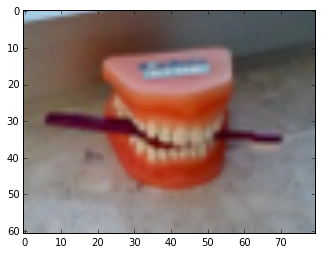

In [229]:
# plot the top images in each cluster

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from PIL import Image
import requests
import StringIO

img_io = requests.get(clustered_urls[0][:10][0])
img = Image.open(StringIO.StringIO(img_io.content))
resized = img.thumbnail((80, 80), Image.ANTIALIAS)
print 'sss'
plt.imshow(img)
plt.show()

In [ ]:
import skimage.io as io
%matplotlib inline

for cat in range(3):
    for idx in range(10):
        imgurl = clustered_urls[cat][idx]
        img_io = requests.get(imgurl)
        img = io.imread(StringIO.StringIO(img_io.content))

        io.imshow(img)
        io.show()
    print '-----------------------'

In [230]:
# get the nearest neighbour pictures

import numpy
from scipy.spatial import distance

def sim_search_k_images(images_features, search_feature):
    """
    images_features is an array of the features
    search_feature is the feature to be searched for nearest neighbour
    
    use distance measure to get the k nearest neighbours
    and return the indices of the samples
    """

    idx = 0
    results = []
    for feature in images_features:
    #while not it.finished:
        #print it.index, it[0], urls[it.index]
        #clustered_urls[it[0]].append(urls[it.index])
        #print clustered_urls
        if numpy.array_equal(feature, search_feature):
            idx += 1
            continue
        
        dst = distance.euclidean(search_feature, feature)
        #print idx, dst
        results.append((idx, dst))
        idx += 1
        
    top_results = sorted(results, key=lambda x: x[1])[:9]
    top_ids = [image[0] for image in top_results]
    return top_ids


In [231]:
# plot 3x3 picture matrix

import skimage.io as io
%matplotlib inline

def plot_3x3(images):
    """
    given 9 images, plot them in 3x3 matrix
    """
    
    for image in images:
        img_io = requests.get(image)
        img = io.imread(StringIO.StringIO(img_io.content))

        io.imshow(img)
        io.show()


[354, 352, 359, 263, 357, 358, 108, 111, 441]
[u'http://farm6.static.flickr.com/5776/22250724749_31ef966ec2_z.jpg', u'http://farm1.static.flickr.com/656/22437509315_0540432fa6_z.jpg', u'http://farm1.static.flickr.com/633/21816377613_5c6c03c8e6_z.jpg', u'http://farm6.static.flickr.com/5735/21687050233_296de889e6_z.jpg', u'http://farm1.static.flickr.com/747/22448414041_11486cd0fa_z.jpg', u'http://farm1.static.flickr.com/590/22448405261_5734a37860_z.jpg', u'http://farm1.static.flickr.com/588/21776684318_7802fc55c7_z.jpg', u'http://farm6.static.flickr.com/5825/21361451154_d0b9512877_z.jpg', u'http://farm6.static.flickr.com/5835/22534995767_b2402c8564_z.jpg']


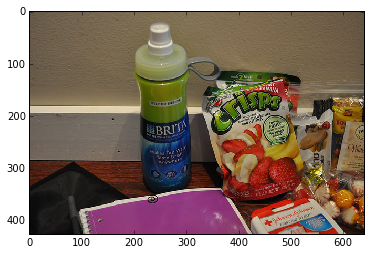

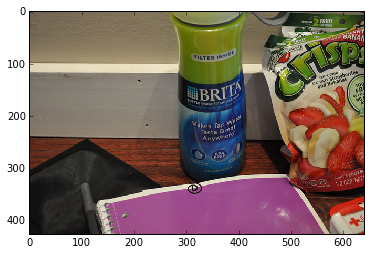

In [ ]:
ids = sim_search_k_images(data, data[3])
print ids

img_urls = [urls[id] for id in ids]
print img_urls

plot_3x3(img_urls)